In [70]:
#steps 
#2.image difference
#3.analysis 
import os
import matplotlib.pyplot as plt
import cv2
import glob
import numpy as np
import quaternion
import tqdm
import bispy as bsp

0it [1:15:05, ?it/s]


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
Data= 'CD_DNN/*/*.bmp'

In [4]:
# Data= '/content/drive/My Drive/CD_DNN/*/*.bmp'

In [5]:
Images=[]
Names = []
for name in glob.glob(Data):
  Images= Images + [cv2.imread(name,cv2.IMREAD_GRAYSCALE)]
  Names = Names +[name]
  print(name)

CD_DNN\Bern-SAR\changed_map.bmp
CD_DNN\Bern-SAR\difference_image.bmp
CD_DNN\Bern-SAR\im1.bmp
CD_DNN\Bern-SAR\im2.bmp
CD_DNN\Bern-SAR\im3.bmp
CD_DNN\Mexico_City-optical\changed_map.bmp
CD_DNN\Mexico_City-optical\difference_image.bmp
CD_DNN\Mexico_City-optical\im1.bmp
CD_DNN\Mexico_City-optical\im2.bmp
CD_DNN\Mexico_City-optical\im3.bmp
CD_DNN\Muragia-optical\im1.bmp
CD_DNN\Muragia-optical\im2.bmp
CD_DNN\Muragia-optical\im3.bmp
CD_DNN\Ottawa-SAR\changed_map.bmp
CD_DNN\Ottawa-SAR\difference_image.bmp
CD_DNN\Ottawa-SAR\im1.bmp
CD_DNN\Ottawa-SAR\im2.bmp
CD_DNN\Ottawa-SAR\im3.bmp
CD_DNN\Yellow River I-SAR\im1.bmp
CD_DNN\Yellow River I-SAR\im2.bmp
CD_DNN\Yellow River I-SAR\rf.bmp
CD_DNN\Yellow River II-SAR\im1.bmp
CD_DNN\Yellow River II-SAR\im2.bmp
CD_DNN\Yellow River II-SAR\im3.bmp
CD_DNN\Yellow River III-SAR\im1.bmp
CD_DNN\Yellow River III-SAR\im2.bmp
CD_DNN\Yellow River III-SAR\reference黄河3.bmp
CD_DNN\Yellow River IV-SAR\im1.bmp
CD_DNN\Yellow River IV-SAR\im2.bmp
CD_DNN\Yellow River IV-SAR

In [6]:
# for i in range(len(Images)):
#   plt.figure()
#   plt.imshow(Images[i],cmap = 'gray')
#   plt.title("{}".format(i)+Names[i])

In [7]:
plt.rcParams['figure.figsize'] = [4, 4] 

Text(0.5, 1.0, 'Second Image')

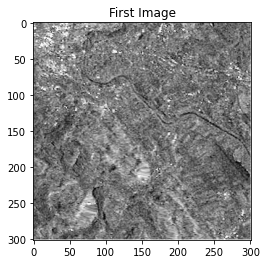

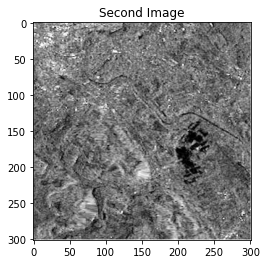

In [8]:
img1 = Images[2]
img2 = Images[3]

plt.imshow(img1,cmap = 'gray')
plt.title("First Image")
plt.figure()
plt.imshow(img2,cmap = 'gray')
plt.title("Second Image")

Text(0.5, 1.0, 'Log Difference Image')

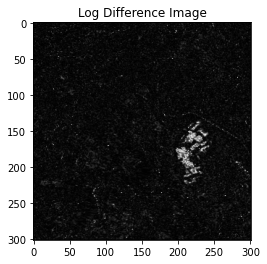

In [9]:
#the output below is the normal log difference
a = np.double(img1) + 1
b = np.double(img2) + 1

log_diff =np.abs(np.log(np.divide(b,a)))
# log_diff =np.uint8(np.abs(np.log(np.divide(b,a))))

# log_diff = log_diff*(255/np.max(log_diff))

plt.imshow(log_diff,cmap = 'gray')
plt.title('Log Difference Image')

# cv2.imshow('Log Difference Image',log_diff)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [124]:
r = log_diff/3
g = log_diff/3
b = log_diff/3

I = (r+g+b)/3
R = r-(g+b)/2;
G = g-(r+b)/2;
B = b-(r+g)/2;
Y = (r+g)/2 - np.abs(r-g)/2 -b;
Y[Y<0] = 0
RG = np.double(R - G)
BY = np.double(B - Y)

In [125]:
temp = np.stack((RG,BY,I,np.zeros(I.shape)),axis = -1)
Q = quaternion.as_quat_array(temp)

In [126]:
Q.shape

(301, 301)

In [127]:
Q_fft = bsp.qfft.Qfft(Q)

In [132]:
A = np.abs(Q_fft)
Phase = Q_fft/A

A=np.log(1+np.fft.fftshift(A))

k = 11
k2 = 5

Ak = cv2.GaussianBlur(A, (k,k),cv2.BORDER_REFLECT)
Ak= np.exp(np.fft.ifftshift(Ak))-1
FL_Filtered = Ak*Phase
FIL = bsp.qfft.iQfft(FL_Filtered)
FIL = np.square(np.abs(FIL))

FIL_smoothened = cv2.GaussianBlur(FIL, (k2,k2),cv2.BORDER_REFLECT)

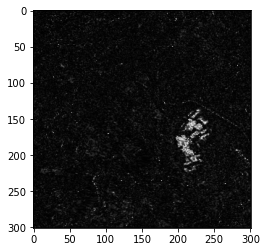

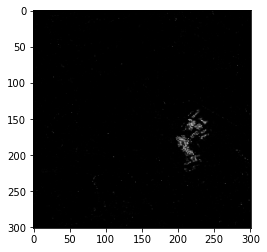

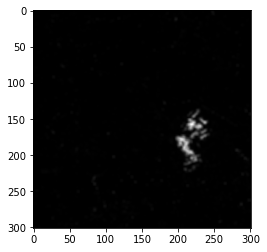

In [134]:
size = (8,8)
plt.figure()#figsize=size)
plt.imshow(log_diff,'gray')
plt.figure()#figsize=size)
plt.imshow(FIL,'gray')
plt.figure()#figsize=size)
plt.imshow(FIL_smoothened,'gray')

# !!!! Old Code Below !!!

Text(0.5, 1.0, 'Centered Freq Spectrum')

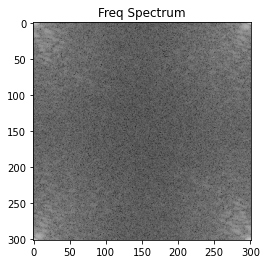

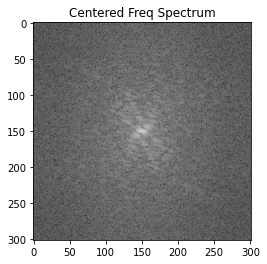

In [124]:
Freq_Diff_normal = np.fft.fft2(log_diff);
plt.imshow(np.log(1+np.abs(Freq_Diff_normal)),cmap = 'gray')
plt.title('Freq Spectrum')

plt.figure()
Freq_Diff_shifted = np.fft.fftshift(Freq_Diff_normal);
plt.imshow(np.log(1+np.abs(Freq_Diff_shifted)),cmap = 'gray')
plt.title('Centered Freq Spectrum')

Text(0.5, 1.0, 'Centered Freq Spectrumc Shifted Back')

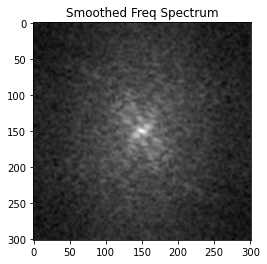

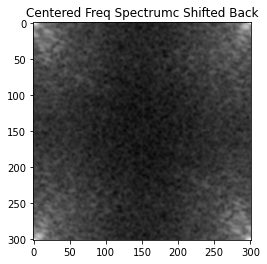

In [136]:
Amplitude = np.abs(Freq_Diff_shifted)
Phase = np.angle(Freq_Diff_shifted)

Smoothed_Amplitude = cv2.GaussianBlur(np.log(1+Amplitude), (5,5),cv2.BORDER_REFLECT)

Smoothed_Amplitude = np.exp(Smoothed_Amplitude)

Combined_Image = np.multiply(Smoothed_Amplitude, np.exp(1j*Phase))

plt.imshow(np.log(1+np.abs(Combined_Image)),cmap = 'gray')
plt.title('Smoothed Freq Spectrum')

plt.figure()
Combined_Image = np.fft.ifftshift(Combined_Image);
plt.imshow(np.log(1+np.abs(Combined_Image)),cmap = 'gray')
plt.title('Centered Freq Spectrumc Shifted Back')

Text(0.5, 1.0, 'Log Difference Image')

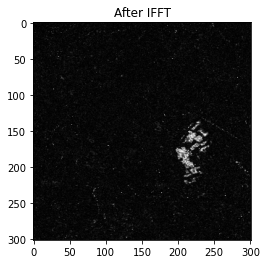

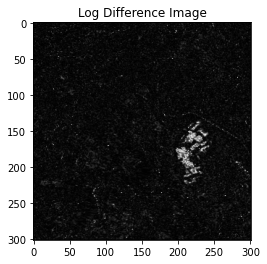

In [137]:
Diff_normal = np.abs(np.fft.ifft2(Combined_Image));
plt.imshow(Diff_normal,cmap = 'gray')
plt.title('After IFFT')

plt.figure()
plt.imshow(log_diff,cmap = 'gray')
plt.title('Log Difference Image')

Text(0.5, 1.0, 'After IFFT')

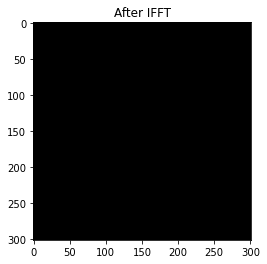

In [127]:
Threshold = 60

Thresholded = Diff_normal.copy()
Thresholded[Thresholded>=Threshold] = 255
Thresholded[Thresholded<Threshold] = 0

plt.imshow(Thresholded,cmap = 'gray')
plt.title('After IFFT')